## Performing Convolution using NumPy library

Convolution in AI is akin to pattern recognition, crucial for tasks like image recognition. 

It processes data in small chunks, detecting features like edges or shapes. 

This allows AI to understand complex inputs incrementally. In essence, it helps AI "see" and interpret the world.

In the Week-5 of this program we will perform Convolution to extract features from the hand wirrten charaters.

Convolution involves sliding a small filter (also known as a kernel) over the image's pixel values. 

At each position, the filter's values are element-wise multiplied with the underlying pixel values, and the results are summed to produce a single value in the output, which forms a new image called a feature map.

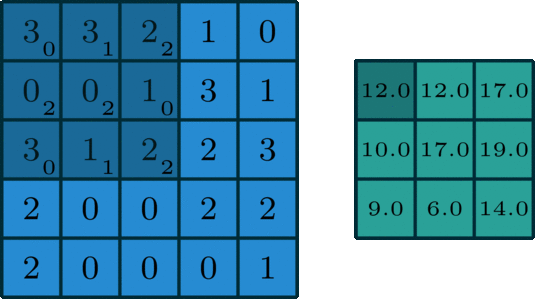


First improt all the required libraries to the workspace. 

We are already familiar with 'matplotlib.pyplot','matplotlib.image'  and 'numpy' libraries.

The folowwing code imports these three libraries to the work space. 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


As similar to the previous leasson , we use the following code to load the 'Car.jpg' and plot it. 

In [ ]:
image = mpimg.imread('Car.jpg')  
plt.imshow(image, cmap='gray')
plt.title('Image of a Car')

The following code extracts the pixels from the image and print it. 

In [ ]:
image_matrix = np.array(image)
print(image_matrix)

This code create a simple 3x3 kernel matrix (or filter matrix) for a convolution task. 

As we discussed, a kernel is like a small filter that is used to process an image. 

It's a matrix of numbers that slides over the image to perform operations like blurring, sharpening, or edge detection.

In [ ]:
# Define a simple 3x3 kernel for blurring
kernel = np.array([[0, 1, 2], [2, 2, 0], [0, 1, 2]])
print(kernel)

Now let's normalize the kernel.

Normalizing the kernel to have a sum of 1 ensures that when it's used for convolution, the image's brightness remains consistent, preventing unintended changes..

This code normalizes the previously defined 3x3 kernel.

It divides each element in the kernel matrix by the sum of all the elements in the kernel.

'np.sum(kernel)' calculates the sum of all the values in the kernel matrix.

In [ ]:
# Normalize the kernel
normalized_kernel = kernel / np.sum(kernel)
print(normalized_kernel)

Now let's perform the convolution operation.

In the following code, in the first line 'np.zeros_like(image)' is used to create an empty (all-zero) numpy array with the same dimensions and data type as the image array and assigned to an empty image called 'convolved_image'

In the second line, a 'for' loop is set up to iterate through the rows of the image, starting from the second row (index 1) and ending at the second-to-last row. This avoids processing the border pixels, as convolution typically doesn't operate on them directly.

Next, inside the outer loop, another 'for' loop is set up to iterate through the columns of the image, also excluding the border pixels.

Then,at each inner loop iteration, the code calculates the convolution at the current pixel (i, j) of the convolved_image. 

It does this by taking a 3x3 neighborhood of pixels from the original image centered around the current pixel (i, j) and multiplying it element-wise with the normalized_kernel.

The np.sum() function then computes the sum of these element-wise multiplications, which represents the result of the convolution operation.

This result is stored in the corresponding pixel of convolved_image.

Finally, the 'convolved_image' matrix is printed.

In [ ]:
# Perform 2D convolution
convolved_image = np.zeros_like(image)
for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
        convolved_image[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * normalized_kernel)

print(convolved_image)

The follwoing code plots both the original and covloved images as a subplot for easy comparisson. 

In [ ]:
# Display the original and convolved images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Convolved Image')
plt.axis('off')

plt.tight_layout()
plt.show()

You can clearly see the difference between the two images. 

Now, Let's change the kernel matrix and perfom the convolution operation and compare the results.


## Performing MaxPooling using NumPy library

Maxpooling is like a helpful tool in AI, especially in picture-related tasks. 

It makes pictures smaller but still keeps the important stuff. It also helps the AI ignore small changes in pictures, pick out the most important things, and learn about different things step by step. 

Plus, it prevents the AI from learning too much about specific pictures, which can be a problem, and it does all of this while keeping things running smoothly.

We will apply this 'maxpooling' operation in the Week-5 of this program for size reduction of the convolved images. 

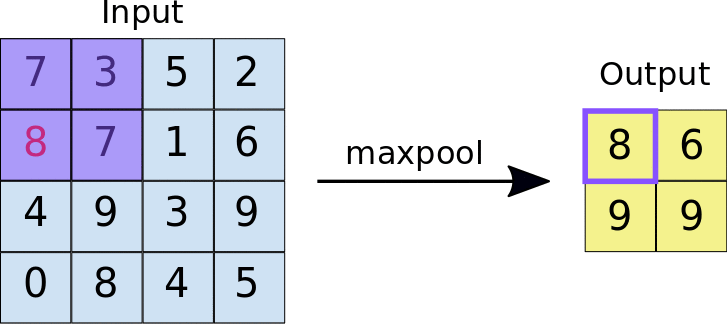

Now let's load the required libraries and load the image into the work space. 

In [ ]:
# Importing the required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#loading the image to the work space
image = mpimg.imread('Car.jpg')  

Now let's define the pool size. 

The follwing code define a variable pool_size and setting its value to 3. 

This variable is used to specify the size of the pooling window when performing max pooling. 

In this case, a pooling window of 3x3 will be used to select the maximum value within each 3x3 region of the image during max pooling.

In [ ]:
# Define the pooling window size
pool_size = 3

In these lines of code, we will prepare to perform max pooling on a previously convolved image. 

The first line gets the dimensions (height and width) of the convolved_image, assuming convolved_image is a NumPy array representing an image or feature map.

Next two liness calculate the dimensions (height and width) of the pooled image. 

In Python, the double forward slash '//' is the floor division operator. 

It's used for division between two numbers, and it returns the largest whole number (integer) that is less than or equal to the result of the division.

For example, 167 // 3 would result in 55 because 55 is the largest whole number less than or equal to 55.66.

They divide the height and width of the convolved_image by the pool_size, which defines the size of the pooling window. 

This step reduces the spatial dimensions of the image, making it smaller.

In [ ]:
# Get the dimensions of the convolved image
height, width = convolved_image.shape

print(f"Convolved image size: {height} pixels height x {width} pixels wide")

# Calculate the dimensions of the pooled image
new_height = height // pool_size
new_width = width // pool_size

print(f"Pooled image size: {new_height} pixels height x {new_width} pixels wide")


Now let's perform the max pooling operation.

The first line of the following code initializes an empty matrix called pooled_image with zeros. This matrix will store the result of the max pooling operation. Its dimensions were determined earlier as 55 by 88.

The following nested 'for' loops iterate through each row and column of the pooled_image matrix as similar to the convolution operation that we performed earlier.

Inside the loop, we  define a region in the convolved_image to perform max pooling on. 

This region is determined by start_row, end_row, start_col, and end_col, which are calculated based on the current values of i and j (the loop counters) and the pool_size. 

This effectively defines the 3x3 window in the convolved_image that you are considering at each iteration.

Finally, we perform max pooling within this defined region by using np.max() to find the maximum value in that window of the convolved_image. This maximum value is then stored in the corresponding location in the pooled_image matrix.

In [ ]:
# Initialize an empty matrix for the pooled result
pooled_image = np.zeros((new_height, new_width))

# Perform max pooling
for i in range(new_height):
    for j in range(new_width):
        start_row, end_row = i * pool_size, (i + 1) * pool_size
        start_col, end_col = j * pool_size, (j + 1) * pool_size
        pooled_image[i, j] = np.max(convolved_image[start_row:end_row, start_col:end_col])


The follwoing code plots both the convolved and pooled images as a subplot for easy comparisson.

In [ ]:
# Display the original and pooled images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(convolved_image, cmap='gray')
plt.title('Convolved Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pooled_image, cmap='gray')
plt.title('Max Pooled Image')
plt.axis('off')

plt.tight_layout()
plt.show()

You can clearly see the difference between the two images.

Let's change the pool size and determine the image and compare.  

## Performing statistical analysis using NumPy library

Statistical analysis is essential in applications such as medical diagnosis and autonomous navigation, enhancing AI's ability to interpret visual data.

Here, we will see how to use Numpy library to extract the important statistical parameters from an image.

We will import the required libraries first and load the image to the workspace, similar to what we have done earlier. 

In [ ]:
# Importing the required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#loading the image to the work space
image = mpimg.imread('Car.jpg')  

This block of code calculates various statistical properties of an image.

Here, we use the built in fuctions in the NumPy libraries to calculate the statistical parameters. 

we simply use 'np.mean()' to calculate the mean intensity of the image pixel values, 'np.average()' to calculate the average intensity of the pixel values. 

Similarly, we can calculate the rest of the stastical parameters using the NumPy library functions.

In [ ]:
# Calculate mean and average intensity
mean_intensity = np.mean(image)
average_intensity = np.average(image)

# Calculate other statistical properties
min_intensity = np.min(image)
max_intensity = np.max(image)
std_deviation = np.std(image)
median_intensity = np.median(image)


print(f"Mean intensity: {mean_intensity}")
print(f"Average intensity: {average_intensity}")
print(f"Minimum intensity: {min_intensity}")
print(f"Maximum intensity: {max_intensity}")
print(f"Standard Deviation : {std_deviation}")
print(f"Median intensity: {median_intensity}")